In [1]:
import numpy as np
import mglearn
import matplotlib.pyplot as plt

X.shape: (26, 2)


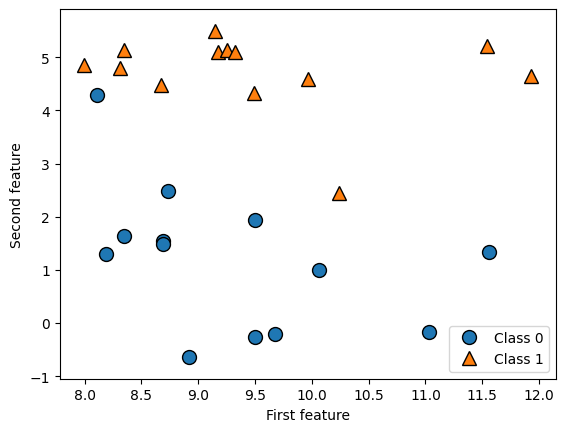

In [2]:
# generate dataset
X, y = mglearn.datasets.make_forge()
# plot dataset
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape:", X.shape)

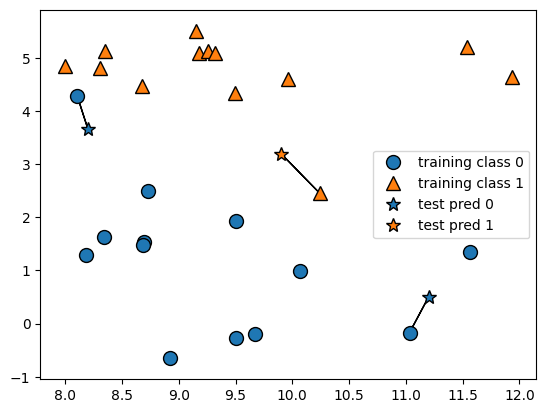

In [24]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

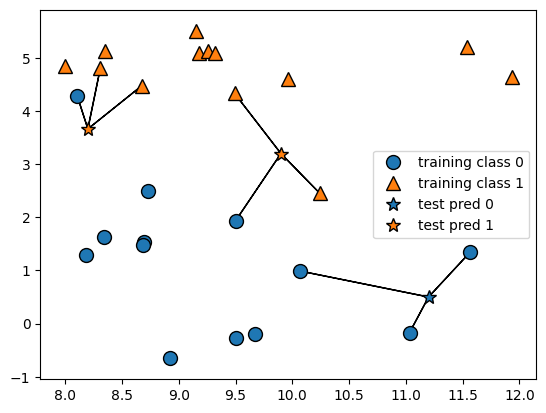

In [26]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [31]:
knn.score(X_test,y_test)

0.8571428571428571

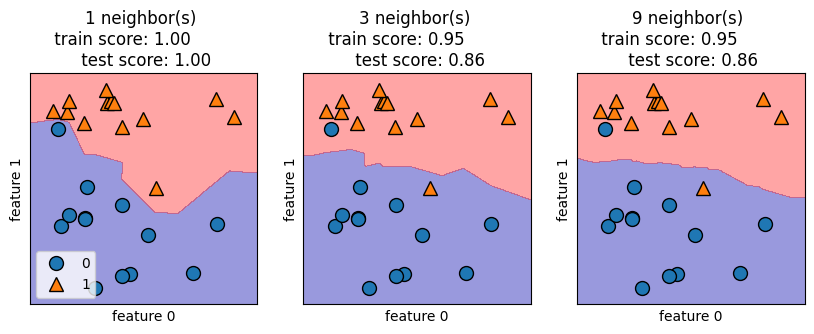

In [37]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # the fit method returns the object self, so we can instantiate
    # and fit in one line
    knn = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(knn, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(f"{n_neighbors} neighbor(s) \n train score: {knn.score(X_train,y_train):.2f} \
        \n test score: {knn.score(X_test,y_test):.2f}")
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

In [7]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(f"cancer keys {cancer.keys()}")

cancer keys dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [9]:
print(f"data shape {cancer['data'].shape}")

data shape (569, 30)


In [22]:
for n,v in zip(cancer['target_names'], np.bincount(cancer.target)):
    print(f"Number of {n} is {v}")             

Number of malignant is 212
Number of benign is 357


In [23]:
print("Feature names:\n", cancer.feature_names)

Feature names:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


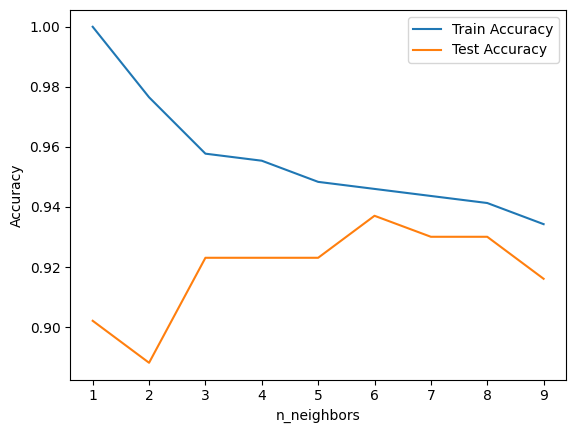

In [41]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target,stratify=cancer.target, random_state=66)
train_accuracy=[]
test_accuracy=[]
neighbors = range(1,10)
for n in neighbors:
    cancer_knn = KNeighborsClassifier(n_neighbors=n)
    cancer_knn.fit(X_train,y_train)
    train_accuracy.append(cancer_knn.score(X_train,y_train))
    test_accuracy.append(cancer_knn.score(X_test,y_test))
plt.plot(neighbors,train_accuracy,label="Train Accuracy")
plt.plot(neighbors,test_accuracy,label="Test Accuracy")
plt.xlabel("Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend(loc="best")


